In [1]:
import numpy as np
# TO STORE AND PROCESS DATA IN DATAFRAME
import pandas as pd
# BASIC VISUALIZATION PACKAGE
import matplotlib.pyplot as plt
# ADVANCED PLOTING
import seaborn as seabornInstance
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
# STATS
from sklearn import datasets, metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
#2015 data
finaldf = pd.read_csv('2015.csv')
usecols = ['Rank','Country','Score','GDP','Support',
'Health','Freedom','Generosity','Corruption']
finaldf.drop(['Region','Standard Error', 'Dystopia Residual'],axis=1,inplace=True)
finaldf.columns = ['Country','Rank','Score','Support',
'GDP','Health',
'Freedom','Generosity','Corruption']
finaldf['Year'] = 2015 #add year column
finaldf.head()

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


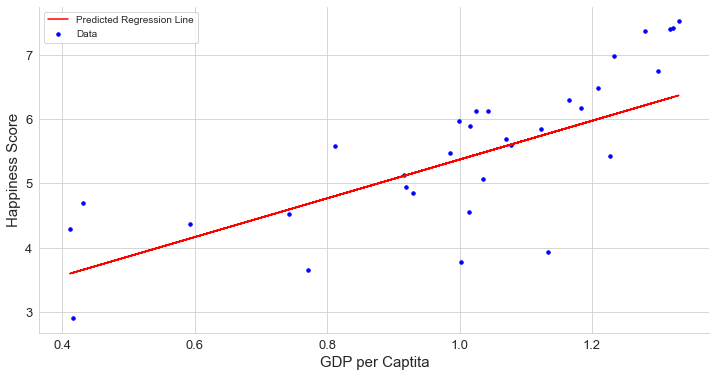

In [2]:
train_data, test_data = train_test_split(finaldf, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['GDP'],
 dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Score'], dtype = pd.Series)
lr.fit(X_train, y_train)
X_test = np.array(test_data['GDP'],
 dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Score'], dtype = pd.Series)
pred = lr.predict(X_test)

seabornInstance.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("GDP per Captita", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

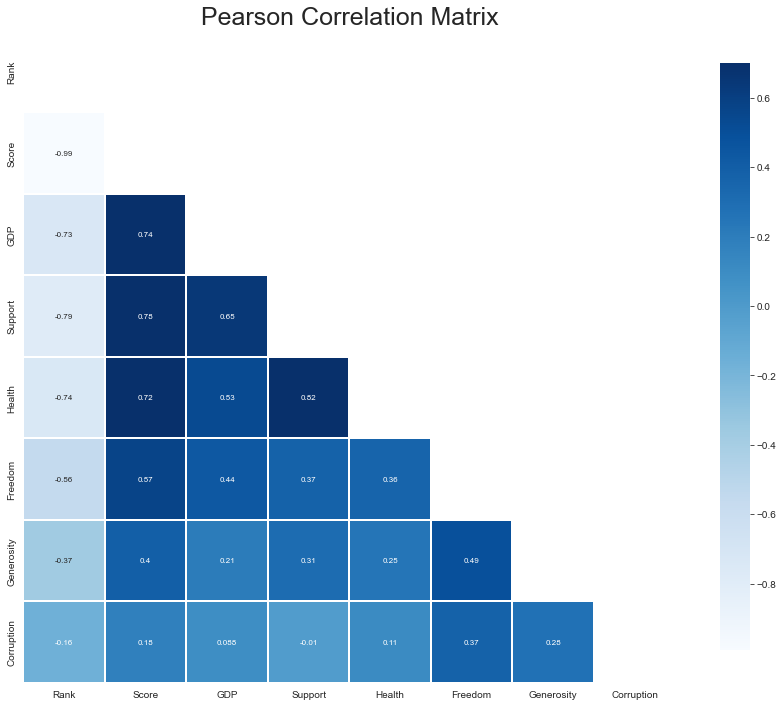

In [3]:
mask = np.zeros_like(finaldf[usecols].corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)
seabornInstance.heatmap(finaldf[usecols].corr(),
 linewidths=0.25,vmax=0.7,square=True,cmap="Blues",
 linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [4]:
evaluation = pd.DataFrame({'Model':[],
                          'Details':[],
                          'Root Mean Squared Error (RMSE)': [],
                          'R-squared (training)': [],
                          'Adjusted R-squared (training)': [],
                          'R-squared (test)':[],
                          'Adjusted R-squared(test)':[],
                           '5-Fold Cross Validation':[]
                        })


In [5]:
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,finaldf[['GDP']],finaldf['Score'],cv=5).mean(),'.3f'))
print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))
print('Happiness score = ',np.round(lr.intercept_,4),
 '+',np.round(lr.coef_,4),'* GDP')
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
print(evaluation)

Average Score for Test Data: 5.528
Intercept: 2.354693128140403
Coefficient: [3.01717727]
Happiness score =  2.3547 + [3.0172] * GDP
                      Model Details  Root Mean Squared Error (RMSE)  \
0  Simple Linear Regression       -                           0.774   

   R-squared (training) Adjusted R-squared (training)  R-squared (test)  \
0                  0.54                             -             0.564   

  Adjusted R-squared(test)  5-Fold Cross Validation  
0                        -                  -11.881  


In [6]:
# MULTIPLE LINEAR REGRESSION 1
train_data_dm,test_data_dm = train_test_split(finaldf,train_size = 0.8,random_state=3)
independent_var = ['GDP','Health','Freedom','Support','Generosity','Corruption']
complex_model_1 = LinearRegression()
complex_model_1.fit(train_data_dm[independent_var],train_data_dm['Score'])
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))
print('Happiness score = ',np.round(complex_model_1.intercept_,4),
 '+',np.round(complex_model_1.coef_[0],4),'∗ Support',
 '+',np.round(complex_model_1.coef_[1],4),'* GDP',
 '+',np.round(complex_model_1.coef_[2],4),'* Health',
 '+',np.round(complex_model_1.coef_[3],4),'* Freedom',
 '+',np.round(complex_model_1.coef_[4],4),'* Generosity',
 '+',np.round(complex_model_1.coef_[5],4),'* Corrption')
pred = complex_model_1.predict(test_data_dm[independent_var])

Intercept: 1.8280680048770845
Coefficients: [1.4529232  0.79787549 1.35410705 0.94963075 0.65080418 0.3888729 ]
Happiness score =  1.8281 + 1.4529 ∗ Support + 0.7979 * GDP + 1.3541 * Health + 0.9496 * Freedom + 0.6508 * Generosity + 0.3889 * Corrption


In [7]:
def adjustedR2(r2,n,k):
 return r2-(k-1)/(n-k)*(1-r2)
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(
 test_data_dm['Score'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(
 train_data_dm[independent_var],
 train_data_dm['Score']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(
 train_data_dm[independent_var],
 train_data_dm['Score']),
 train_data_dm.shape[0],
 len(independent_var)),'.3f'))
rtecm = float(format(complex_model_1.score(
 test_data_dm[independent_var],
 test_data_dm['Score']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(
 test_data_dm[independent_var],test_data['Score']),
 test_data_dm.shape[0],
 len(independent_var)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,
 finaldf[independent_var],
 finaldf['Score'],cv=5).mean(),'.3f'))
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
1,Multiple Linear Regression-1,selected features,0.540,0.771,0.761,0.788,0.747,-5.827
0,Simple Linear Regression,-,0.774,0.540,-,0.564,-,-11.881
